In [19]:
from buienradar.buienradar import (get_data, parse_data)

from buienradar.constants import (CONTENT, RAINCONTENT, SUCCESS)

# minutes to look ahead for precipitation forecast

# (5..120)
timeframe = 5

# gps-coordinates for the weather data

latitude = 52.1

longitude = 5.10

result = get_data(latitude=latitude,

                  longitude=longitude,

                  )

if result.get(SUCCESS):

    data = result[CONTENT]

    raindata = result[RAINCONTENT]

    result = parse_data(data, raindata, latitude, longitude)

print(result)

{'success': True, 'msg': None, 'data': {'attribution': 'Data provided by buienradar.nl', 'forecast': [{'condition': {'condcode': 'q', 'condition': 'rainy', 'detailed': 'rainy', 'exact': 'Heavily clouded with rain', 'exact_nl': 'Zwaar bewolkt en regen', 'night': False, 'image': 'https://www.buienradar.nl/resources/images/icons/weather/30x30/q.png'}, 'temperature': 15.0, 'mintemp': 12.0, 'maxtemp': 16.0, 'sunchance': 20, 'rainchance': 60, 'rain': 0.0, 'minrain': 0.0, 'maxrain': 0.0, 'snow': 0, 'windforce': 4, 'windspeed': 5.66, 'winddirection': 'ZW', 'windazimuth': 225, 'datetime': datetime.datetime(2024, 5, 3, 0, 0, tzinfo=<DstTzInfo 'Europe/Amsterdam' CEST+2:00:00 DST>)}, {'condition': {'condcode': 'b', 'condition': 'cloudy', 'detailed': 'partlycloudy', 'exact': 'Mix of clear and medium or low clouds', 'exact_nl': 'Mix van opklaringen en middelbare of lage bewolking', 'night': False, 'image': 'https://www.buienradar.nl/resources/images/icons/weather/30x30/b.png'}, 'temperature': 18.0, 

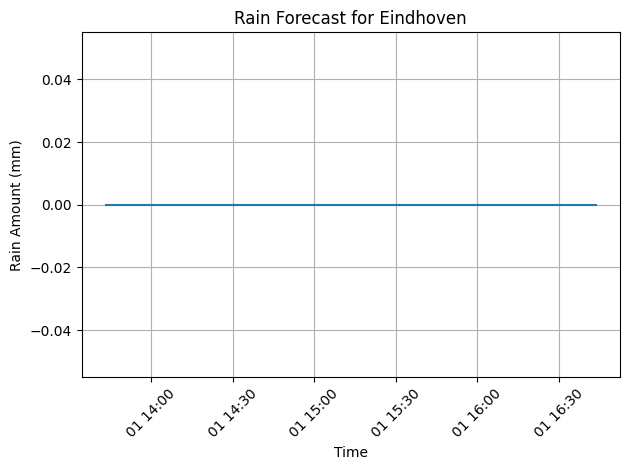

In [21]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pytz

# Define the Europe/Amsterdam timezone
amsterdam_tz = pytz.timezone('Europe/Amsterdam')

# Extract relevant data from the result
forecast_data = result['data']['forecast']
precipitation_forecast = result['data']['precipitation_forecast']

# Extract timestamps and rain chances for the forecast
timestamps = [forecast['datetime'] for forecast in forecast_data]
rain_amounts = [forecast['rain'] for forecast in forecast_data]

# Convert current_time to aware datetime
current_time = datetime.now(amsterdam_tz)

# Create a list of future timestamps from now to 180 minutes ahead with steps of 5 minutes
future_timestamps = [current_time + timedelta(minutes=i) for i in range(0, 181, 5)]

# Initialize a list to store the rain amounts for each timestamp
rain_forecast = []

# Iterate through each future timestamp and find the corresponding rain amount
for timestamp in future_timestamps:
    # Find the nearest forecasted timestamp
    nearest_timestamp = min(timestamps, key=lambda x: abs(x - timestamp))
    # Get the index of the nearest timestamp
    index = timestamps.index(nearest_timestamp)
    # Get the rain amount for the nearest timestamp
    rain_amount = rain_amounts[index]
    # Append the rain amount to the rain_forecast list
    rain_forecast.append(rain_amount)

# Plot the data as a line graph
plt.plot(future_timestamps, rain_forecast, '-')
plt.xlabel('Time')
plt.ylabel('Rain Amount (mm)')
plt.title('Rain Forecast for Eindhoven')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
import json
from datetime import datetime

class DateTimeEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, datetime):
            return obj.isoformat()
        return json.JSONEncoder.default(self, obj)

latitude = 51.4412855
la = 45.116177
lo = 7.742615
longitude = 5.4812349
timeframe = 5

result = get_data(latitude=la, longitude=lo)

if result.get(SUCCESS):
    data = result[CONTENT]
    raindata = result[RAINCONTENT]
    result = parse_data(data, raindata, latitude, longitude)
    
print(result)

# Now, you can serialize the dictionary to JSON using the custom encoder
json_result = json.dumps(result, cls=DateTimeEncoder)

print(json_result)


Status: 404, Msg: Got http statuscode: 404.


{'success': True, 'msg': None, 'data': {'attribution': 'Data provided by buienradar.nl', 'forecast': [{'condition': {'condcode': 'q', 'condition': 'rainy', 'detailed': 'rainy', 'exact': 'Heavily clouded with rain', 'exact_nl': 'Zwaar bewolkt en regen', 'night': False, 'image': 'https://www.buienradar.nl/resources/images/icons/weather/30x30/q.png'}, 'temperature': 15.0, 'mintemp': 12.0, 'maxtemp': 16.0, 'sunchance': 20, 'rainchance': 60, 'rain': 0.0, 'minrain': 0.0, 'maxrain': 0.0, 'snow': 0, 'windforce': 4, 'windspeed': 5.66, 'winddirection': 'ZW', 'windazimuth': 225, 'datetime': datetime.datetime(2024, 5, 3, 0, 0, tzinfo=<DstTzInfo 'Europe/Amsterdam' CEST+2:00:00 DST>)}, {'condition': {'condcode': 'b', 'condition': 'cloudy', 'detailed': 'partlycloudy', 'exact': 'Mix of clear and medium or low clouds', 'exact_nl': 'Mix van opklaringen en middelbare of lage bewolking', 'night': False, 'image': 'https://www.buienradar.nl/resources/images/icons/weather/30x30/b.png'}, 'temperature': 18.0, 